In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('S05-hw-dataset.csv')

In [3]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [5]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [6]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Распределение target классов: 
0 встречается в 59% случаях
1 встречается в 41% случаях

In [7]:
df.drop('default', axis=1)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,51,131729,6,687,0.283093,3,1,1,0,13136,14209,0.251680,19,3,2
2996,2997,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12
2997,2998,38,63305,16,573,0.577888,2,13,0,1,24870,6689,0.366375,16,2,10
2998,2999,42,55606,33,689,0.659278,6,9,1,0,32677,3252,0.295284,16,2,8


In [8]:
df[(df['age']<21) | (df['age']>69)]

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default


Нарушений в возврастном диапазоне необнаружено

In [9]:
df[abs(df['age'] - df['years_employed']) < 18]

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,2990,41,70168,35,541,0.265943,6,2,0,1,20626,-142,0.227945,1,0,13,0
2990,2991,43,50783,29,560,0.368942,6,10,0,1,0,7146,0.147362,10,2,10,1
2992,2993,30,36394,35,724,0.277715,4,10,1,0,40323,5394,0.251583,8,2,11,1
2996,2997,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12,0


Обнаружено большое количество аномалий в стаже рабоы. Например, Человек работает 22 года, но имеет возраст
25 лет => Работает с 3-х лет

In [10]:
df.isnull().sum()

client_id                         0
age                               0
income                            0
years_employed                    0
credit_score                      0
debt_to_income                    0
num_credit_cards                  0
num_late_payments                 0
has_mortgage                      0
has_car_loan                      0
savings_balance                   0
checking_balance                  0
region_risk_score                 0
phone_calls_to_support_last_3m    0
active_loans                      0
customer_tenure_years             0
default                           0
dtype: int64

Пустые ячейки необнаружены

In [11]:
for key in df.keys():
    print(key, 100-df[[key]].nunique().sum() / len(df[[key]])*100)

client_id 0.0
age 98.36666666666666
income 2.5333333333333314
years_employed 98.66666666666667
credit_score 88.0
debt_to_income 0.0
num_credit_cards 99.73333333333333
num_late_payments 99.5
has_mortgage 99.93333333333334
has_car_loan 99.93333333333334
savings_balance 11.599999999999994
checking_balance 17.166666666666657
region_risk_score 0.0
phone_calls_to_support_last_3m 99.33333333333333
active_loans 99.83333333333333
customer_tenure_years 99.5
default 99.93333333333334


Процентное соотношение неуникальных значений. client_id имеет значение 0% => 
Все упомянания клиентов уникальны

In [12]:
X = df.drop(['default', 'client_id'], axis=1)

In [13]:
len(X.keys())

15

Количество признаков 15

In [14]:
y = df[['default']]

In [15]:
y

,default
0,0
1,0
2,0
3,1
4,1
...,...
2995,0
2996,0
2997,1
2998,1


In [16]:
df.dtypes

client_id                           int64
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
default                             int64
dtype: object

In [17]:
for key in df.keys():
    print(key, min(df[key]), max(df[key]))

client_id 1 3000
age 21 69
income 15000 156351
years_employed 0 39
credit_score 402 850
debt_to_income 0.0061471149847966 0.878343349584274
num_credit_cards 0 7
num_late_payments 0 14
has_mortgage 0 1
has_car_loan 0 1
savings_balance 0 75237
checking_balance -3000 29335
region_risk_score 0.0011480532639611 0.9617329449691724
phone_calls_to_support_last_3m 0 19
active_loans 0 4
customer_tenure_years 0 14
default 0 1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
X_train

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
1807,44,69026,20,574,0.329730,0,11,1,0,41351,9476,0.708387,6,1,7
220,27,32483,27,787,0.130256,4,8,0,1,45155,5254,0.526402,10,4,7
1534,61,57865,11,752,0.305342,6,1,0,1,0,8447,0.313577,10,3,13
468,29,91655,22,645,0.501431,0,11,0,1,11929,6663,0.444252,1,1,6
974,28,63934,19,656,0.267514,1,9,0,0,24708,3864,0.195720,16,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,35,33067,31,721,0.334815,1,6,0,1,9529,6803,0.205425,8,3,7
2626,68,49543,0,656,0.303512,3,8,1,1,17130,22804,0.354079,5,3,6
2688,52,67095,30,803,0.627390,6,2,0,1,14739,3345,0.580329,19,0,10
751,28,94489,34,534,0.320567,6,3,1,0,14508,10708,0.418475,15,2,14


In [20]:
y_train

,default
1807,1
220,0
1534,0
468,1
974,0
...,...
2185,1
2626,1
2688,0
751,0


In [21]:
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [23]:
accuracy_score(baseline.predict(X_test), y_test)

0.59

In [24]:
y_proba = baseline.predict_proba(X_test)[:,1]

In [25]:
y_proba

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
roc_auc_score(y_test, y_proba)

np.float64(0.5)

In [27]:
from sklearn.model_selection import GridSearchCV

model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LogisticRegression(max_iter=1000, solver='liblinear'))
])

param_grid = {
    'regressor__C': np.linspace(0.001, 1, 50),
    'regressor__penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

In [28]:
y_train = np.ravel(y_train)

In [29]:
y_train

array([1, 0, 0, ..., 0, 0, 0], shape=(2400,))

In [30]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_['regressor__C'])
print(grid_search.best_params_['regressor__penalty'])
model = grid_search

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.062163265306122456
l1


In [31]:
accuracy_score(model.predict(X_test), y_test)

0.8

In [32]:
y_proba = model.predict_proba(X_test)

In [33]:
y_proba = y_proba[:,1]

In [34]:
roc_auc_score(y_test, y_proba)

np.float64(0.877049745073722)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [37]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.79      0.69      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.78      0.79       600
weighted avg       0.80      0.80      0.80       600



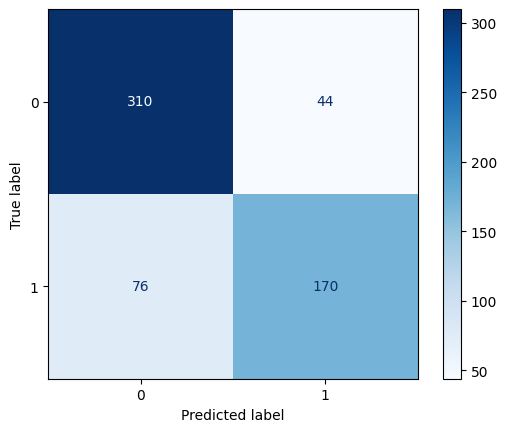

In [38]:
ds = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

In [39]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

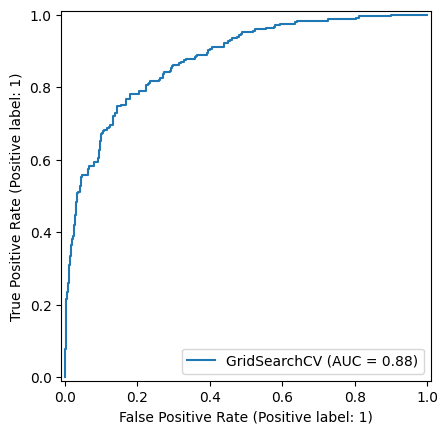

In [40]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.savefig('figures/ROC_logistic.jpg')

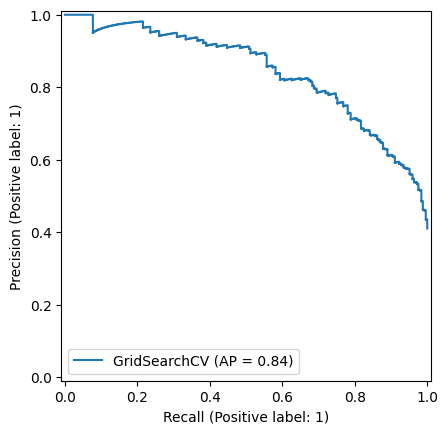

In [41]:
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.savefig('figures/PR_logistic.jpg')

In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = np.ravel(y_test)
y_pred_baseline_cv = cross_val_predict(baseline, X_test, y_test, cv=5)
y_pred_lr_cv = cross_val_predict(model, X_test, y_test, cv=5)

y_pred_baseline = baseline.predict(X_test)
y_pred_lr = model.predict(X_test)

results = []

baseline_metrics = {
    'Model': 'DummyClassifier (most_frequent)',
    'Accuracy': accuracy_score(y_test, y_pred_baseline_cv),
    'Precision': precision_score(y_test, y_pred_baseline_cv, average='weighted'),
    'Recall': recall_score(y_test, y_pred_baseline_cv, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_baseline_cv, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test, y_pred_baseline_cv, average='weighted')
}
results.append(baseline_metrics)

lr_metrics = {
    'Model': 'LogisticRegression',
    'Accuracy': accuracy_score(y_test, y_pred_lr_cv),
    'Precision': precision_score(y_test, y_pred_lr_cv, average='weighted'),
    'Recall': recall_score(y_test, y_pred_lr_cv, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_lr_cv, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test, y_pred_lr_cv, average='weighted')
}
results.append(lr_metrics)

results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

print("Сравнение моделей:")
print(results_df.to_string())


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Сравнение моделей:
                                 Accuracy  Precision    Recall  F1-score   ROC-AUC
Model                                                                             
DummyClassifier (most_frequent)  0.590000   0.348100  0.590000  0.437862  0.500000
LogisticRegression               0.786667   0.785363  0.786667  0.785439  0.774562


C:\Users\Ильяс\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
results_df.to_csv('artifacts/result.csv')

In [44]:
results_df

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Model,,,,,
DummyClassifier (most_frequent),0.590000,0.348100,0.590000,0.437862,0.500000
LogisticRegression,0.786667,0.785363,0.786667,0.785439,0.774562


Baseline значительно отличается по качеству от полноценной модели, поскольку baseline работает
по принципу запоминания самого частого значения target, т.е. в нашем случае значение 0, что является примитивным способом классификации, подразумевающим только предсказывания одного значения, такой метод способен лишь определить нижнюю оценку качества классификации, меньше которой полноценной модели быть неползволительно. 

Точность baseline близка к 0.5, что очень близко к обычному случайному распределению, то же самое можно сказать и про метрику ROC-AUC.
В свою очередь метрики Accuracy и ROC-AUC модели значительно больше -- около 80%, что говорит о неплохом качестве обучения.

Модель подобрала гиперпараметр регуляризации C = 0.062 для l1 регуляризации, что говорит о мизерной необходимости в регуляризации

In [45]:
from sklearn.ensemble import RandomForestClassifier

Для поставленной задачи классификации больше всего подойдет метод случайного леса, поскольку данный подход 
является более точным, устойчивым к выборосам и не требует масштабирования данных, имеет чуть более высокий риск переобучения, который легко контролируется максимальной глубиной 

In [46]:
forest_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [47]:
y_pred = forest_model.predict(X_test)

In [48]:
accuracy_score(y_pred, y_test)

0.7716666666666666

In [49]:
y_proba = forest_model.predict_proba(X_test)[:,1]

In [50]:
roc_auc_score(y_test, y_proba)

np.float64(0.8485542694409994)

In [51]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       354
           1       0.76      0.64      0.70       246

    accuracy                           0.77       600
   macro avg       0.77      0.75      0.76       600
weighted avg       0.77      0.77      0.77       600



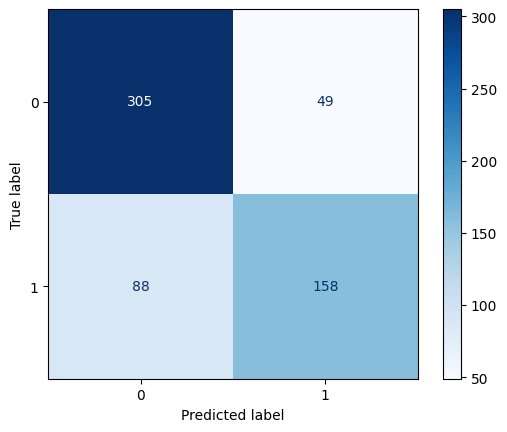

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

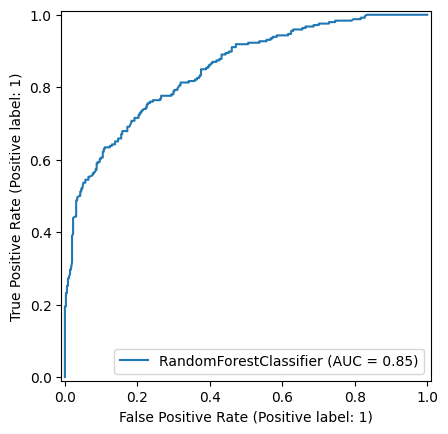

In [53]:
RocCurveDisplay.from_estimator(forest_model, X_test, y_test)
plt.savefig('figures/ROC_forest.jpg')

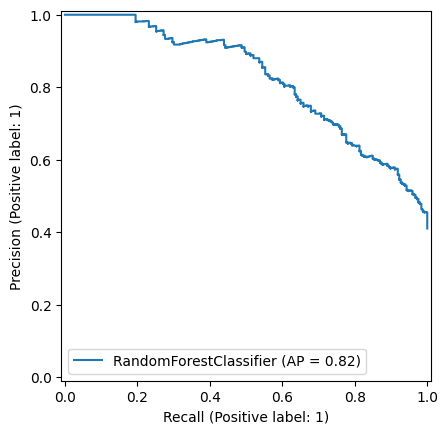

In [54]:
PrecisionRecallDisplay.from_estimator(forest_model, X_test, y_test)
plt.savefig('figures/PR_forest.jpg')

In [65]:
from sklearn.calibration import CalibratedClassifierCV

forest_calib_model = CalibratedClassifierCV(forest_model, method='sigmoid', cv = 5)
forest_calib_model.fit(X_train, y_train)

CalibratedClassifierCV(cv=5,
                       estimator=RandomForestClassifier(max_depth=15,
                                                        random_state=42))

In [56]:
y_pred = forest_calib_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7816666666666666

In [57]:
y_proba = forest_calib_model.predict_proba(X_test)[:,1]

In [58]:
roc_auc_score(y_test, y_proba)

np.float64(0.8558633043957558)

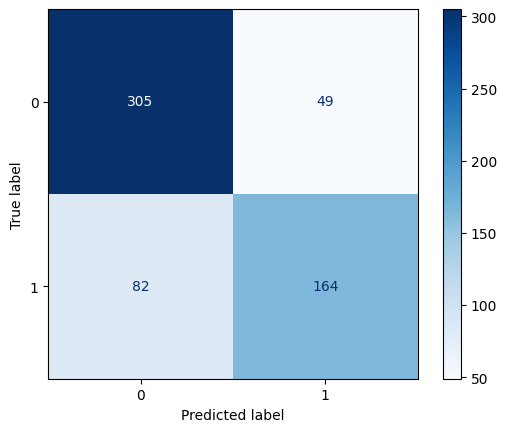

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

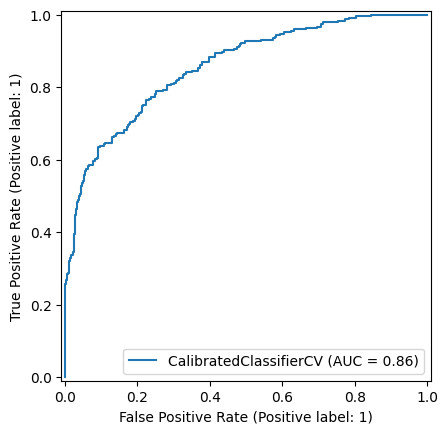

In [60]:
RocCurveDisplay.from_estimator(forest_calib_model, X_test, y_test)
plt.savefig('figures/ROC_forest_calib.jpg')

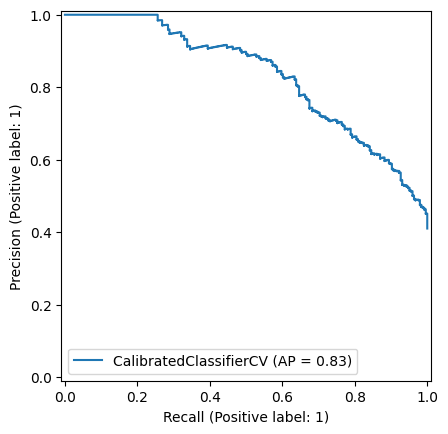

In [61]:
PrecisionRecallDisplay.from_estimator(forest_calib_model, X_test, y_test)
plt.savefig('figures/PR_forest_calib.jpg')

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = np.ravel(y_test)
y_pred_baseline_cv = cross_val_predict(baseline, X_test, y_test, cv=5)
y_pred_lr_cv = cross_val_predict(forest_calib_model, X_test, y_test, cv=5)

y_pred_baseline = baseline.predict(X_test)
y_pred_lr = forest_calib_model.predict(X_test)

results = []

baseline_metrics = {
    'Model': 'DummyClassifier (most_frequent)',
    'Accuracy': accuracy_score(y_test, y_pred_baseline_cv),
    'Precision': precision_score(y_test, y_pred_baseline_cv, average='weighted'),
    'Recall': recall_score(y_test, y_pred_baseline_cv, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_baseline_cv, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test, y_pred_baseline_cv, average='weighted')
}
results.append(baseline_metrics)

lr_metrics = {
    'Model': 'RandomForestClassifier(Calibrate)',
    'Accuracy': accuracy_score(y_test, y_pred_lr_cv),
    'Precision': precision_score(y_test, y_pred_lr_cv, average='weighted'),
    'Recall': recall_score(y_test, y_pred_lr_cv, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_lr_cv, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test, y_pred_lr_cv, average='weighted')
}
results.append(lr_metrics)

results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

print("Сравнение моделей:")
print(results_df.to_string())


Сравнение моделей:
                                 Accuracy  Precision    Recall  F1-score   ROC-AUC
Model                                                                             
DummyClassifier (most_frequent)  0.590000   0.348100  0.590000  0.437862  0.500000
RandomForestClassifier           0.781667   0.780403  0.781667  0.779125  0.765364


C:\Users\Ильяс\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Можно заметить, что значения после калибровки веротности незначительно уменьшились, что говорит о том, что калибровка не является универсальным решенением проблем с точностью, посколько, делая распределение вероятностей равномерным, может уменьшить качестве

In [63]:
results_df.to_csv('artifacts/forest_result.csv')